### What Is Ensemble?
* The ensemble methods in machine learning combine the insights obtained from multiple learning models to facilitate accurate and improved decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Bagging
### Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
iris=datasets.load_iris()

In [7]:
X_train,y_train=iris.data[:,1:3],iris.target

In [12]:
model=RandomForestClassifier(random_state=1)

In [13]:
from sklearn import model_selection
scores=model_selection.cross_val_score(model,X_train,y_train,cv=3,scoring='accuracy')
print(scores)

[0.96 0.94 0.96]


In [14]:
scores.mean()

0.9533333333333333

### Stacking

In [15]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\data_clean_titanic.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [16]:
df.shape

(891, 25)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 non-null    i

In [18]:
df.isna().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [19]:
X=df.drop('Survived', axis=1)
y=df.Survived

In [22]:
X.shape

(891, 24)

In [23]:
y.shape

(891,)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [52]:
def model_prediction(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    pred_test=model.predict(X_test)    
    return pred_train,pred_test

In [53]:
DT=DecisionTreeClassifier(random_state=0)
M1_train,M1_test=model_prediction(DT,X_train,y_train,X_test)

In [33]:
knn=KNeighborsClassifier()
M2_train,M2_test=model_prediction(knn,X_train,y_train,X_test)

In [34]:
LR=LogisticRegression(random_state=0)
M3_train,M3_test=model_prediction(LR,X_train,y_train,X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
train_pred={'DT':M1_train,'knn':M2_train,'LR':M3_train}
print(train_pred)

{'DT': array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0

In [40]:
df1=pd.DataFrame(train_pred)

In [41]:
df1

,DT,knn,LR
0,1,1,0
1,1,1,1
2,0,0,0
3,0,1,0
4,0,1,1
...,...,...,...
618,1,1,1
619,1,1,1
620,0,0,0
621,1,0,1


In [44]:
test_pred={'DT':M1_test,'knn':M2_test,'LR':M3_test}
df2=pd.DataFrame(test_pred)
df2

,DT,knn,LR
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,1,1,1
...,...,...,...
263,0,0,0
264,0,0,0
265,0,0,0
266,1,0,1


In [45]:
model=LogisticRegression()
model.fit(df1,y_train)

LogisticRegression()

In [46]:
model.score(df2,y_test)

0.753731343283582

### Boosting
### Gradient Boost Machine

In [59]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\data_clean_titanic.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [60]:
X=df.drop('Survived', axis=1)
y=df.Survived

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [62]:
!pip install lightgbm

In [63]:
import lightgbm as lgb

In [67]:
model=lgb.LGBMClassifier(learning_rate=0.05,max_depth=5,random_state=0)
model.fit(X_train,y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8283582089552238

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

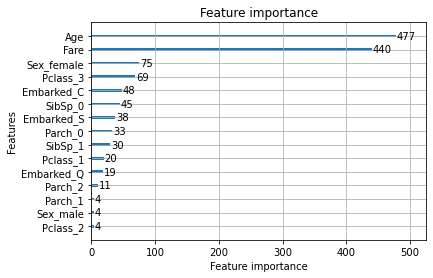

In [70]:
lgb.plot_importance(model)

### XG Boost

In [72]:
!pip install xgboost

In [73]:
from xgboost import XGBClassifier
clf=XGBClassifier()
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9678972712680578
0.8208955223880597


In [75]:
clf=XGBClassifier(random_state=96, n_estimators=50)

In [77]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=96,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9502407704654896
0.8283582089552238
